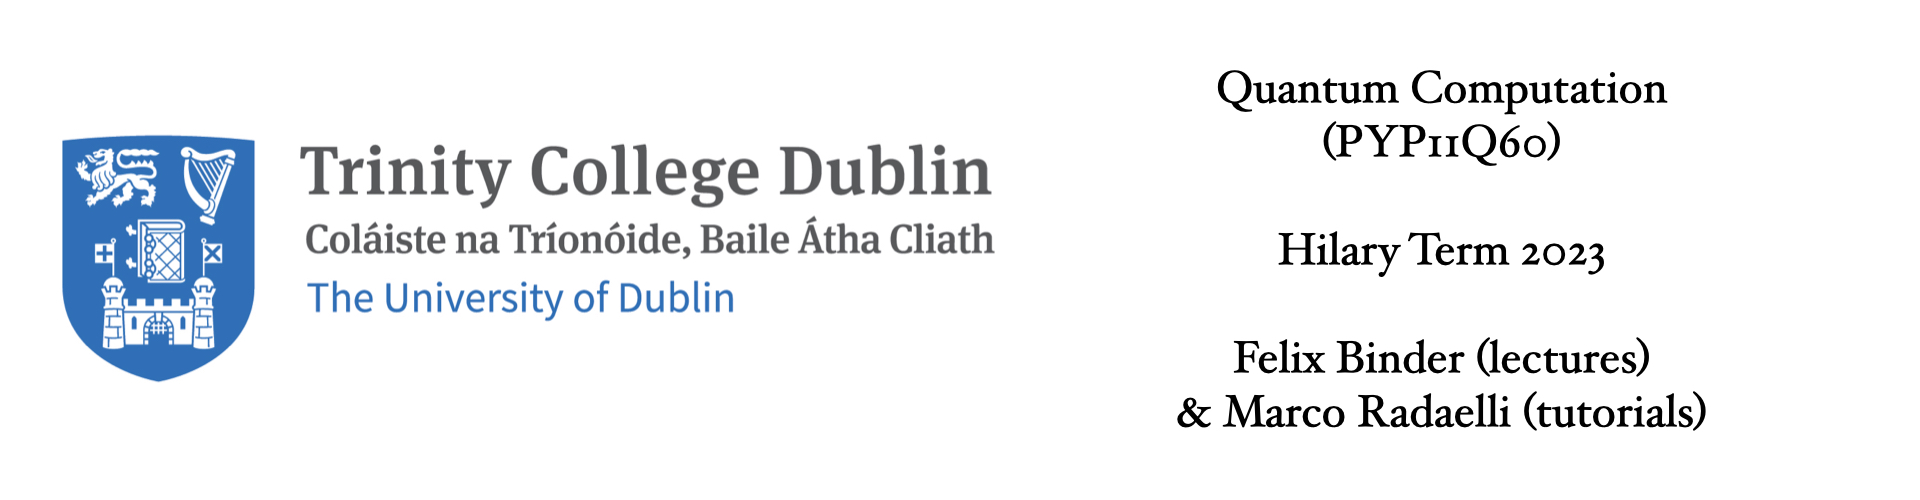

# Problem set 3

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# 3.0 - Dependencies
Please add all relevant dependencies for the problems to the following cell and avoid the <code>import</code> command elsewhere.

In [133]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

# 3.1 - Quantum Fourier Transform (3 pts.)

Consider the unitary operator $\mathcal{F}$ for the Quantum Fourier Transform (QFT)
$$\mathcal{F} \ket{j} = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi i j k /N}\ket{k}.$$
<ol>
    <li>Compute explicitly the Fourier transform on the $n$ qubits state $\ket{0\ldots 0}$</li>
    <li>We already know a quantum circuit for $\mathcal{F}$ from the lectures. In Qiskit, create that circuit for 5 qubits, and transform it into a gate using the appropriate functions.</li>
        <li>Give a quantum circuit for the inverse Quantum Fourier Transform (i.e., for the operator $\mathcal{F}^\dagger$) on 5 qubits. Create that circuit in Qiskit and also transform it into a gate.</li>
    <li>Again using Qiskit, create the circuits $\mathcal{F}\mathcal{F}^\dagger$ and $\mathcal{F}^\dagger\mathcal{F}$. Obtain the matrix representation of the two circuits, and show that it is equal to the identity in both cases.</li>
</ol>

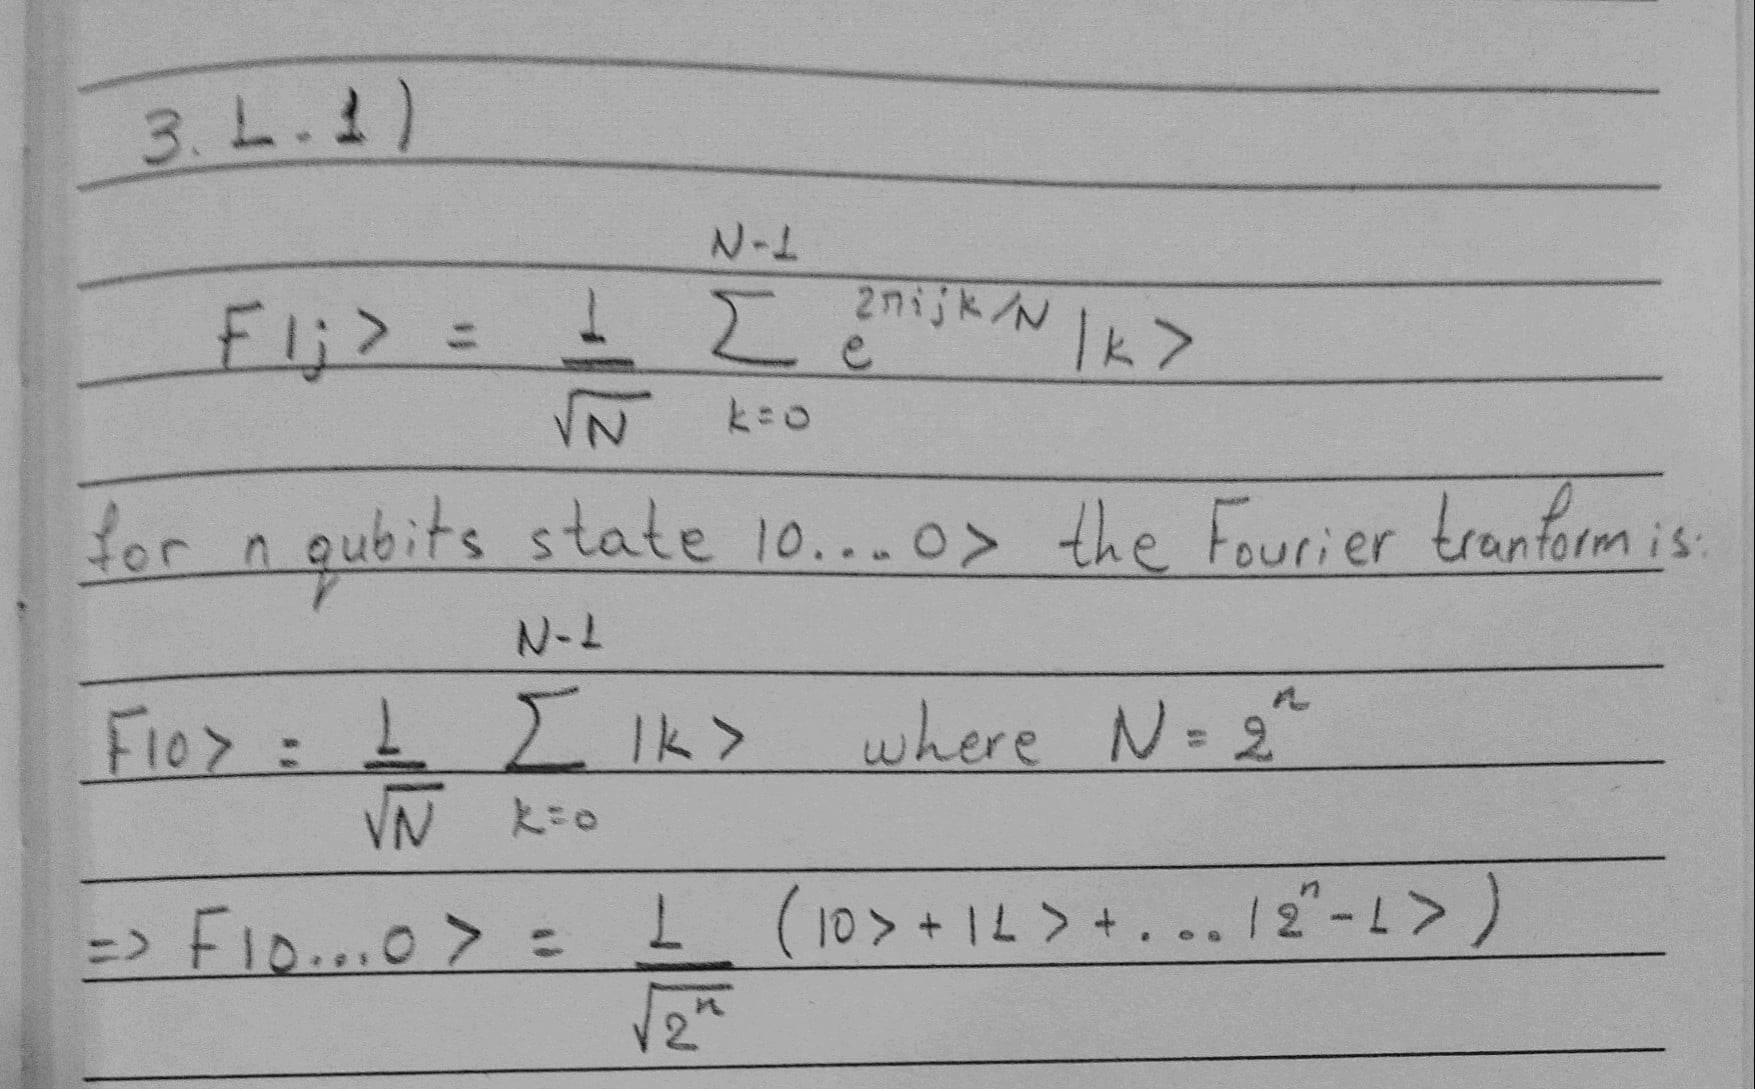

In [21]:
#crating the qft circuit from lectures for 5 qubits applying H gates and phase gates as follows and swaping the output
#qubits (0,4) and (1,3) in order to get the correct result.
qftcirc = QuantumCircuit(5)
qftcirc.h(0)
qftcirc.cp(np.pi/2, 1, 0)
qftcirc.cp(np.pi/4, 2, 0)
qftcirc.cp(np.pi/8, 3, 0)
qftcirc.cp(np.pi/16, 4, 0)
qftcirc.h(1)
qftcirc.cp(np.pi/2, 2, 1)
qftcirc.cp(np.pi/4, 3, 1)
qftcirc.cp(np.pi/8, 4, 1)
qftcirc.h(2)
qftcirc.cp(np.pi/2, 3, 2)
qftcirc.cp(np.pi/4, 4, 2)
qftcirc.h(3)
qftcirc.cp(np.pi/2, 4, 3)
qftcirc.h(4)
qftcirc.swap(0, 4)
qftcirc.swap(1, 3)

qftcirc.draw()

┌───┐                                                                 »
q_0: ┤ H ├─■────────■─────────────■─────────────────■──────────────────────»
     └───┘ │P(π/2)  │       ┌───┐ │                 │                      »
q_1: ──────■────────┼───────┤ H ├─┼────────■────────┼─────────■────────────»
                    │P(π/4) └───┘ │        │P(π/2)  │         │       ┌───┐»
q_2: ───────────────■─────────────┼────────■────────┼─────────┼───────┤ H ├»
                                  │P(π/8)           │         │P(π/4) └───┘»
q_3: ─────────────────────────────■─────────────────┼─────────■────────────»
                                                    │P(π/16)               »
q_4: ───────────────────────────────────────────────■──────────────────────»
                                                                           »
«                                                      
«q_0: ───────────────────────────────────────────────X─
«                                                    │ 
«q_1: ─■─────────────────────────────────────────X───┼─
«      │                                         │   │ 
«q_2: ─┼────────■────────■───────────────────────┼───┼─
«      │        │P(π/2)  │       ┌───┐           │   │ 
«q_3: ─┼────────■────────┼───────┤ H ├─■─────────X───┼─
«      │P(π/8)           │P(π/4) └───┘ │P(π/2) ┌───┐ │ 
«q_4: ─■─────────────────■─────────────■───────┤ H ├─X─
«                                              └───┘

In [22]:
QFTgate = qftcirc.to_gate(label='QFT') # qft gate

In [36]:
#creating the inverse qft circuit for 5 qubits. Basically drawing the circuit backward changing the phase gates with
#thei inverse and applying them properly to get the inverse qft.
inv_qftcirc = QuantumCircuit(5)
inv_qftcirc.swap(0, 4)
inv_qftcirc.swap(1, 3)
inv_qftcirc.h(4)
inv_qftcirc.cp(-np.pi/16, 0, 4)
inv_qftcirc.cp(-np.pi/8, 1, 4)
inv_qftcirc.cp(-np.pi/4, 2, 4)
inv_qftcirc.cp(-np.pi/2, 3, 4)
inv_qftcirc.h(3)
inv_qftcirc.cp(-np.pi/8, 0, 3)
inv_qftcirc.cp(-np.pi/4, 1, 3)
inv_qftcirc.cp(-np.pi/2, 2, 3)
inv_qftcirc.h(2)
inv_qftcirc.cp(-np.pi/4, 0, 2)
inv_qftcirc.cp(-np.pi/2, 1, 2)
inv_qftcirc.h(1)
inv_qftcirc.cp(-np.pi/2, 0, 1)
inv_qftcirc.h(0)


inv_qftcirc.draw()


»
q_0: ─X───────■─────────────────────────────────────────────■──────────────────»
      │       │                                             │                  »
q_1: ─┼───X───┼──────────■──────────────────────────────────┼─────────■────────»
      │   │   │          │                                  │         │        »
q_2: ─┼───┼───┼──────────┼─────────■────────────────────────┼─────────┼────────»
      │   │   │          │         │                  ┌───┐ │P(-π/8)  │P(-π/4) »
q_3: ─┼───X───┼──────────┼─────────┼─────────■────────┤ H ├─■─────────■────────»
      │ ┌───┐ │P(-π/16)  │P(-π/8)  │P(-π/4)  │P(-π/2) └───┘                    »
q_4: ─X─┤ H ├─■──────────■─────────■─────────■─────────────────────────────────»
        └───┘                                                                  »
«                                                       ┌───┐
«q_0: ────────────────■────────────────────────■────────┤ H ├
«                     │                  ┌───┐ │P(-π/2) └───┘
«q_1: ────────────────┼─────────■────────┤ H ├─■─────────────
«               ┌───┐ │P(-π/4)  │P(-π/2) └───┘               
«q_2: ─■────────┤ H ├─■─────────■────────────────────────────
«      │P(-π/2) └───┘                                        
«q_3: ─■─────────────────────────────────────────────────────
«                                                            
«q_4: ───────────────────────────────────────────────────────
«

In [37]:
INV_QFTgate = inv_qftcirc.to_gate(label='INV_QFT') #inverse qft gate

In [38]:
#F Fdagger circ
ffdag_circ = QuantumCircuit(5)
ffdag_circ.append(QFTgate,[0,1,2,3,4])
ffdag_circ.append(INV_QFTgate,[0,1,2,3,4])
ffdag_circ.draw()

┌──────┐┌──────────┐
q_0: ┤0     ├┤0         ├
     │      ││          │
q_1: ┤1     ├┤1         ├
     │      ││          │
q_2: ┤2 QFT ├┤2 INV_QFT ├
     │      ││          │
q_3: ┤3     ├┤3         ├
     │      ││          │
q_4: ┤4     ├┤4         ├
     └──────┘└──────────┘

In [39]:
#Fdagger F circuit
fdagf_circ = QuantumCircuit(5)
fdagf_circ.append(INV_QFTgate,[0,1,2,3,4])
fdagf_circ.append(QFTgate,[0,1,2,3,4])
fdagf_circ.draw()

┌──────────┐┌──────┐
q_0: ┤0         ├┤0     ├
     │          ││      │
q_1: ┤1         ├┤1     ├
     │          ││      │
q_2: ┤2 INV_QFT ├┤2 QFT ├
     │          ││      │
q_3: ┤3         ├┤3     ├
     │          ││      │
q_4: ┤4         ├┤4     ├
     └──────────┘└──────┘

In [41]:
#turning ffdag circ into matrix
backend = Aer.get_backend('unitary_simulator')
job = execute(ffdag_circ, backend)
result = job.result()

print(result.get_unitary(ffdag_circ,3))
print('The resulting matrix is the Identity as expected')

Operator([[ 1.-0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, -0.+0.j,  0.+0.j],
          [-0.+0.j,  1.-0.j,  0.-0.j, ..., -0.+0.j,  0.+0.j, -0.+0.j],
          [-0.+0.j, -0.-0.j,  1.-0.j, ..., -0.+0.j, -0.+0.j,  0.+0.j],
          ...,
          [-0.+0.j,  0.+0.j,  0.+0.j, ...,  1.-0.j,  0.+0.j, -0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, ...,  0.+0.j,  1.-0.j,  0.-0.j],
          [-0.+0.j,  0.+0.j, -0.+0.j, ...,  0.-0.j, -0.+0.j,  1.-0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))
The resulting matrix is the Identity as expected


In [43]:
#turning fdagf into matrix
backend = Aer.get_backend('unitary_simulator')
job = execute(fdagf_circ, backend)
result = job.result()

print(result.get_unitary(fdagf_circ,3))
print('The resulting matrix is the Identity as expected and FdaggerF = FFdagger')

Operator([[ 1.-0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j,  1.-0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j,  0.+0.j,  1.-0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          ...,
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  1.-0.j,  0.+0.j,  0.-0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  1.-0.j,  0.-0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.-0.j,  0.+0.j,  1.-0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))
The resulting matrix is the Identity as expected and FdaggerF = FFdagger


# 3.2 - Quantum Phase Estimation (8 pts. total)

## 3.2.a Qiskit code /1 (4 pts.)

<ol>
    <li>In Qiskit, create the quantum circuit for quantum phase estimation of a <code>T-gate</code>. How many qubits do you need to consider to obtain an exact value for the phase for the eigenstate $\ket{0}$? How many for the eigenstate $\ket{1}$?</li>
    <li>Create a complete Python function <code>phase_estimation(oracle, eigenstate, number_qubits)</code> which performs the phase estimation for a generic oracle <code>oracle</code> on the eigenstate <code>eigenstate</code>, employing <code>number_qubits</code> qubits. The function should perform a quantum simulation, and return the estimated value of the phase (i.e., to bit-precision of <code>number_qubits</code>). Apply the function to the <code>T-gate</code> of the previous exercise, and verify that it works as expected.</li>
    <li>Now, run the function with a different oracle, given by $R_z\left(\frac{1}{3}\right)$. What happens?</li>
    <li>In a graph, plot the highest-probability result obtained for the phase estimation of $R_z\left(\frac{1}{3}\right)$, as a function of the number of employed qubits <code>number_qubits</code>.</li>
</ol>

In [58]:
#3.2.1)

#defining a general function for the inverse qft for n number of qubits(Qiskit textbook)
def invqft(qcirc, n):
    for qubit in range(n//2):
        qcirc.swap(qubit, n-qubit-1)
    for j in range(n):
        for k in range(j):
            qcirc.cp(-np.pi/float(2**(j-k)), k, j)
        qcirc.h(j)

In [60]:
QPEcirc = QuantumCircuit(4,3)
QPEcirc.h(0)
QPEcirc.h(1)
QPEcirc.h(2)

aps = 1 #times that the controlled phase gate will be applied in every target qubit
for tar_qubit in range(3):
    for i in range(aps):
        QPEcirc.cp(np.pi/4, tar_qubit, 3)
    aps = aps * 2
    
QPEcirc.barrier()
invqft(QPEcirc, 3)
QPEcirc.barrier()
QPEcirc.measure(0,0)
QPEcirc.measure(1,1)
QPEcirc.measure(2,2)

QPEcirc.draw()

┌───┐                                                                ░    »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─»
     ├───┤ │                                                              ░  │ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼─»
     ├───┤ │        │        │                                            ░  │ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X─»
     └───┘ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░    »
q_3: ──────■────────■────────■────────■────────■────────■────────■────────░────»
                                                                          ░    »
c: 3/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌───┐                                         ░ ┌─┐      
«q_0: ┤ H ├─■──────────────■────────────────────────░─┤M├──────
«     └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
«q_1: ──────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
«                    └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
«q_2: ─────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
«                                             └───┘ ░  ║  ║ └╥┘
«q_3: ──────────────────────────────────────────────░──╫──╫──╫─
«                                                   ░  ║  ║  ║ 
«c: 3/═════════════════════════════════════════════════╩══╩══╩═
«                                                      0  1  2

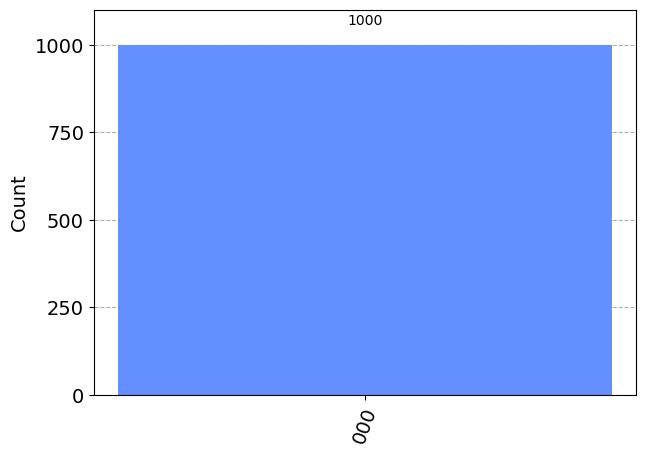

In [88]:
#implementing simulation to test the result of the cicuit above
aer_sim = Aer.get_backend('aer_simulator')
job = assemble(QPEcirc, shots=1000)
results = aer_sim.run(job).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
#since our control qubit is in state |0> , we get the result 0 for the phase which we were expecting since there is no
#action to the target qubits, something we can verify also from the eigenvalue equation of the T_gate.
#In order to create the circuit we need at least 4 qubits which is the minimum amount of total qubits for a QPEcircuit

In [67]:
QPEcirc2 = QuantumCircuit(4,3)
QPEcirc2.h(0)
QPEcirc2.h(1)
QPEcirc2.h(2)
QPEcirc2.x(3)

aps = 1 #times that the controlled phase gate will be applied in every target qubit
for tar_qubit in range(3):
    for i in range(aps):
        QPEcirc2.cp(np.pi/4, tar_qubit, 3)
    aps = aps * 2
    
QPEcirc2.barrier()
invqft(QPEcirc2, 3)
QPEcirc2.barrier()
QPEcirc2.measure(0,0)
QPEcirc2.measure(1,1)
QPEcirc2.measure(2,2)

QPEcirc2.draw()

┌───┐                                                                ░    »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░──X─»
     ├───┤ │                                                              ░  │ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░──┼─»
     ├───┤ │        │        │                                            ░  │ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░──X─»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░    »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░────»
     └───┘                                                                ░    »
c: 3/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌───┐                                         ░ ┌─┐      
«q_0: ┤ H ├─■──────────────■────────────────────────░─┤M├──────
«     └───┘ │P(-π/2) ┌───┐ │                        ░ └╥┘┌─┐   
«q_1: ──────■────────┤ H ├─┼─────────■──────────────░──╫─┤M├───
«                    └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║ └╥┘┌─┐
«q_2: ─────────────────────■─────────■────────┤ H ├─░──╫──╫─┤M├
«                                             └───┘ ░  ║  ║ └╥┘
«q_3: ──────────────────────────────────────────────░──╫──╫──╫─
«                                                   ░  ║  ║  ║ 
«c: 3/═════════════════════════════════════════════════╩══╩══╩═
«                                                      0  1  2

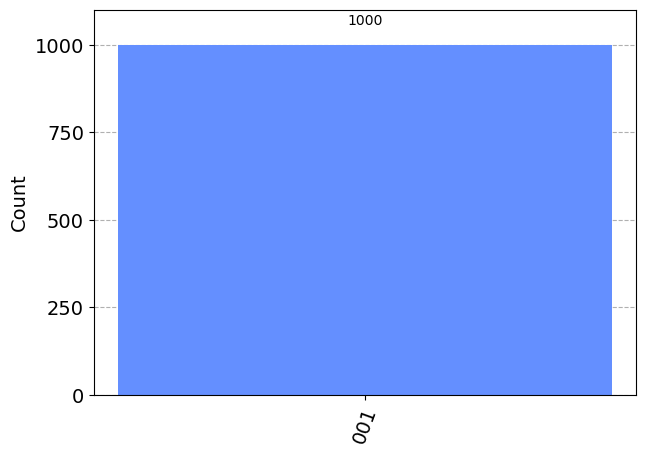

In [87]:
aer_sim = Aer.get_backend('aer_simulator')
job = assemble(QPEcirc2, shots=1000)
results = aer_sim.run(job).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
#The result that we get is 001 = 1 and we get it with certainty as well. Deviding the result with 2^n,where n=3(qbits)
#we obtain the phase θ=1/8 which corresponds to the result we were expecting from the eigenvalue equation since the
#eigenvalue of T acting on the state|1> is e^ιπ/4 (U|ψ>= e^2ιπθ|ψ>). Again the amount of qubits neccessary for the 
#QPEcircuit is 4 which is the minimum amount of qubits in order to apply the QPE algorithm.

In [228]:
#3.2.a.2)

def phase_estimation(oracle, eigenstate, n):
    circ = QuantumCircuit(n , n -1) #creating the circuit with n qubits and n-1 bits for measuring
    if eigenstate == 1: #if the eigenstate given is 1 apply x gate 
        circ.x(n-1)
    c_oracle = oracle.to_gate(label='controlled-oracle').control(1)  #implementing the control_oracle gate
    for i in range(n): #handamards
        circ.h(i)
    for k in range(n-1):
        aps = 2**k     # Apply the orakcle 2^k times
        for i in range(aps):
            circ.append(c_oracle,[k,n-1])
    circ.barrier()
    invqft(circ, n-1) #inverse qft
    circ.barrier()
    for i in range(n-1): #measuring
        circ.measure(i, i)
    backend = Aer.get_backend('aer_simulator') #simulating
    job = execute(circ, backend, shots=1000)
    counts = job.result().get_counts()
    highest_prob = max(counts, key = counts.get)
    return highest_prob, plot_histogram(counts)

In [241]:
oracle = QuantumCircuit(1)
oracle.t(0)
phase_estimation(oracle, 1, 4)[0] #you can change the[0] to [1] to see the histogram

'000'

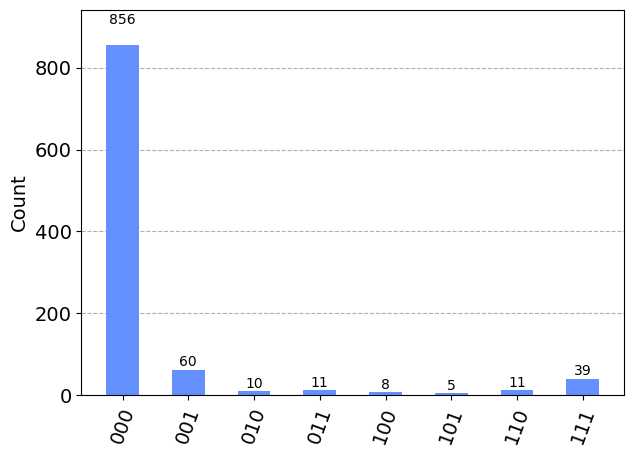

In [245]:
#3.2.b.3)

oracle = QuantumCircuit(1)
oracle.rz(1/3, 0)
phase_estimation(oracle, 1, 4)[1]

In [ ]:
#The value that we were expecting for Rz(1/3) is: 2πλ=1/6 => λ=0.027. Instead we observe that the highest probability
#is for θ=0 and the second highest is for θ=1/8=0.125 with 0 being the most dominant. So this histogram tells us that
#the correct value is between 0-0.125 and much closer to 0.
#This tells us that we have to use more qubits to approximate better the value of the phase.

## 3.2.b Analytical treatment of the error (4 pts.)
After the controlled application of the oracle, but before the final QFT, the state of the first $m$-qubit register is:
$$\ket{\theta} = \frac{1}{2^m} \sum_{k=0}^{2^m-1} e^{2\pi i k \theta} \ket{k}$$
where $\theta$ is the parameter to be estimated. 

<ol>
    <li>Apply the QFT to $\ket{\theta}$, and give an analytical expression for the output state.</li>
    <li>Determine the probability to obtain an outcome $j \in \{0,\ldots,2^m-1\}$ when performing the measurement.</li>
    <li>Show that, if there exists a $j=\tilde{j}$ such that $\theta=\frac{\tilde{j}}{2^m}$ (i.e., $\theta$ has an exact representation in $m$ bits), then the outcome of the measurement is $j$ with unit probability.</li>
    <li>If this is not the case, let $j^*$ be the specific value of $j$ which gives the best estimate $\frac{j^*}{2^m}$ of $\theta$. In other words, it should be true that $\theta = \frac{j}{2^m} +\varepsilon$, where $|\varepsilon| < 2^{-(m+1)}$. Prove that the probability of getting the outcome $j^*$ for the measurement is larger than $\frac{4}{\pi^2}$. </li>
</ol>

<b>Hint.</b> The following inequalities are given:
$$\frac{2\pi |\varepsilon| 2^m}{|e^{2\pi i \varepsilon 2^m}-1|}\leq \frac{\pi}{2}$$ <br>
$$|e^{2\pi i \varepsilon} - 1| \leq 2\pi |\varepsilon|$$

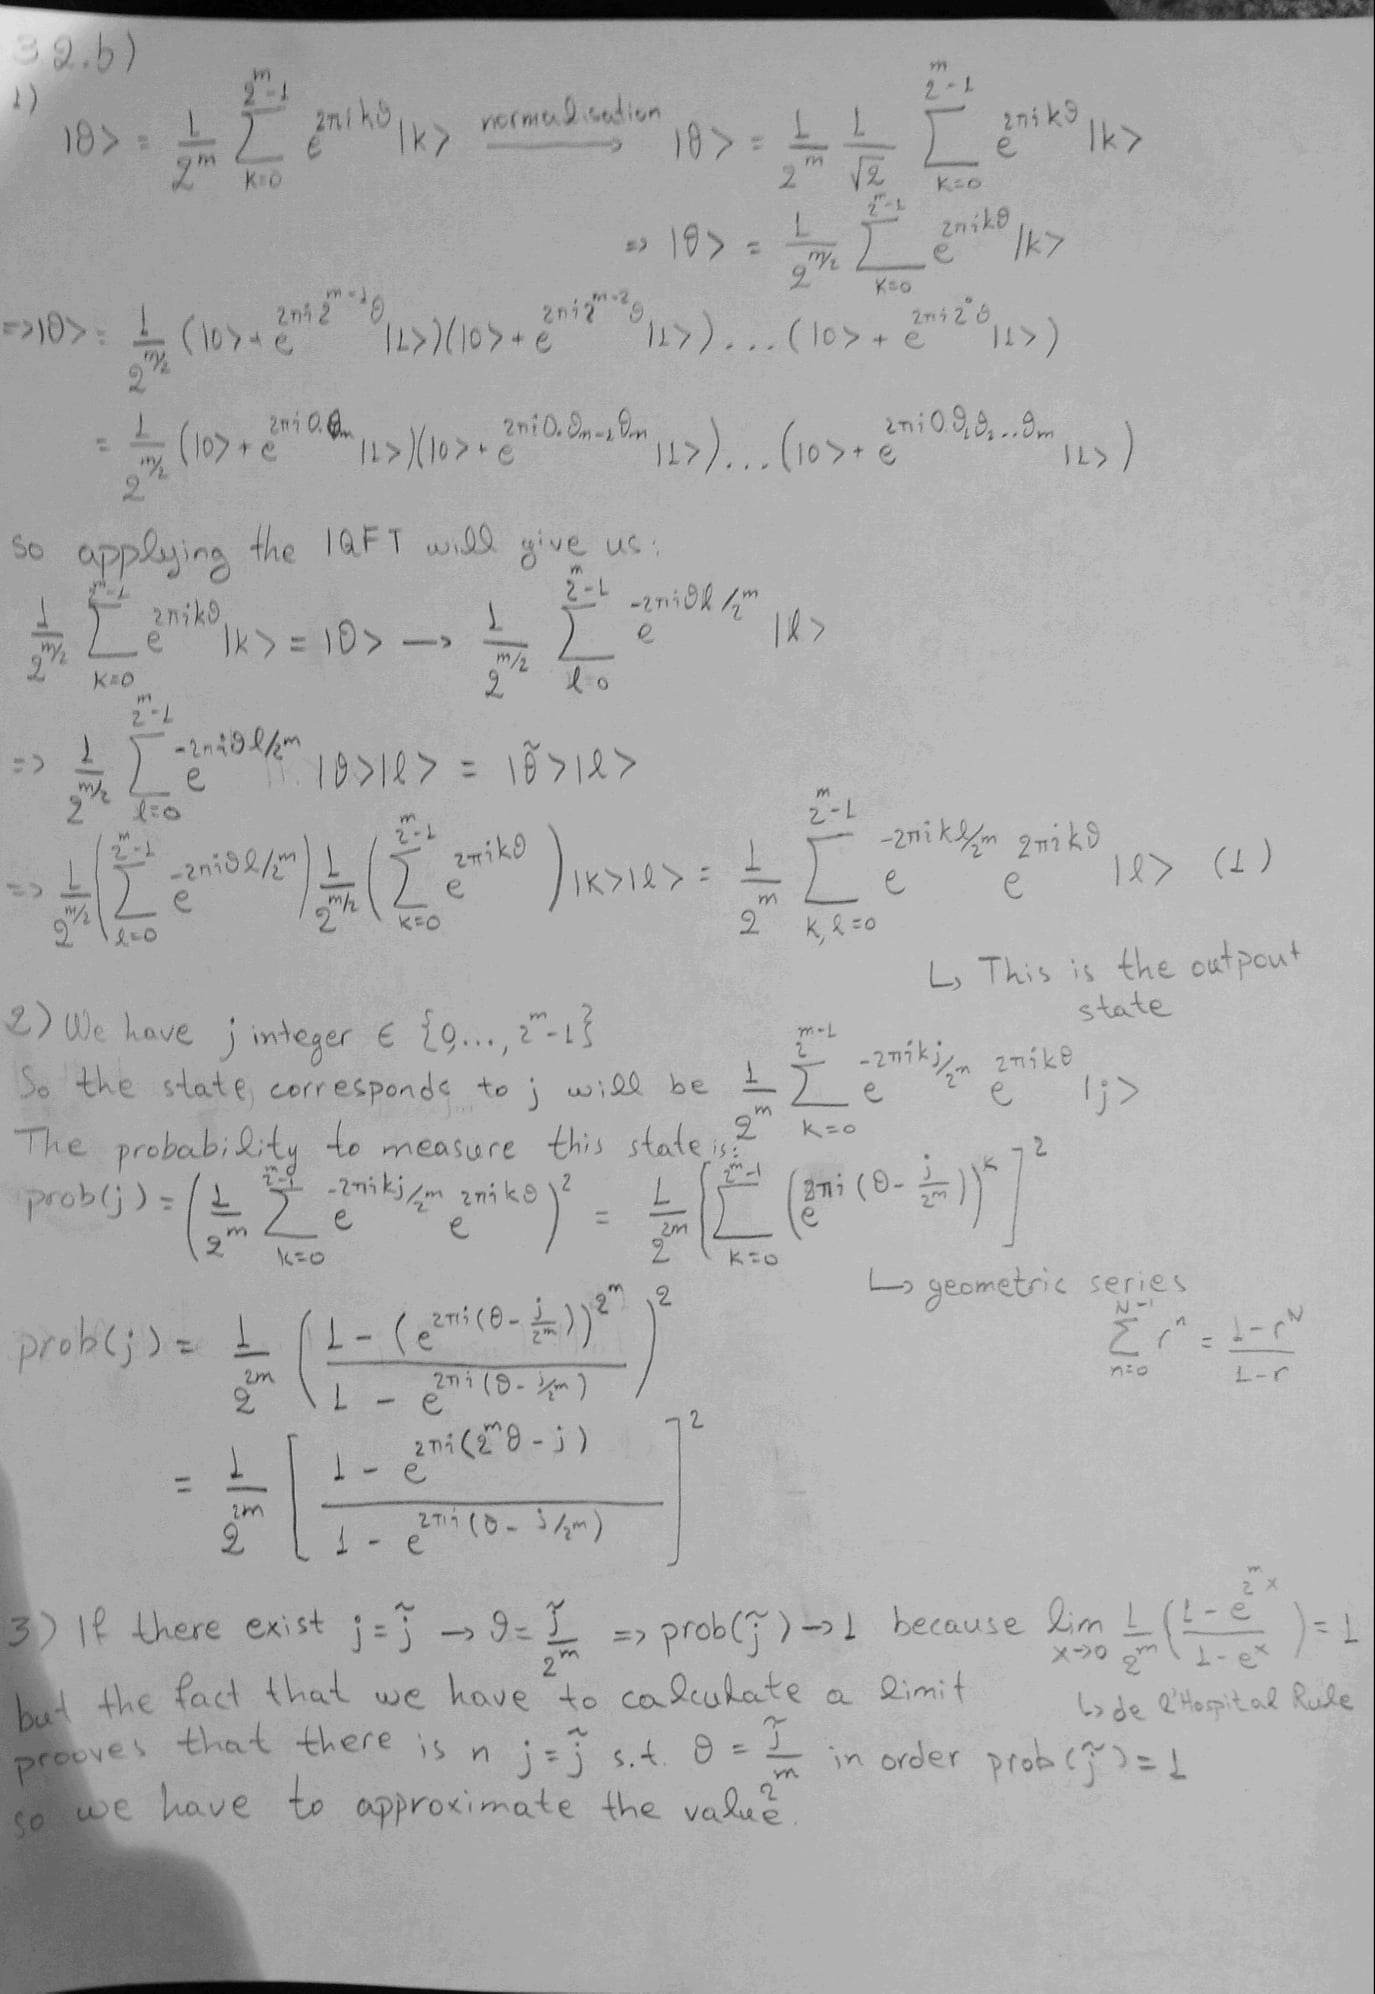

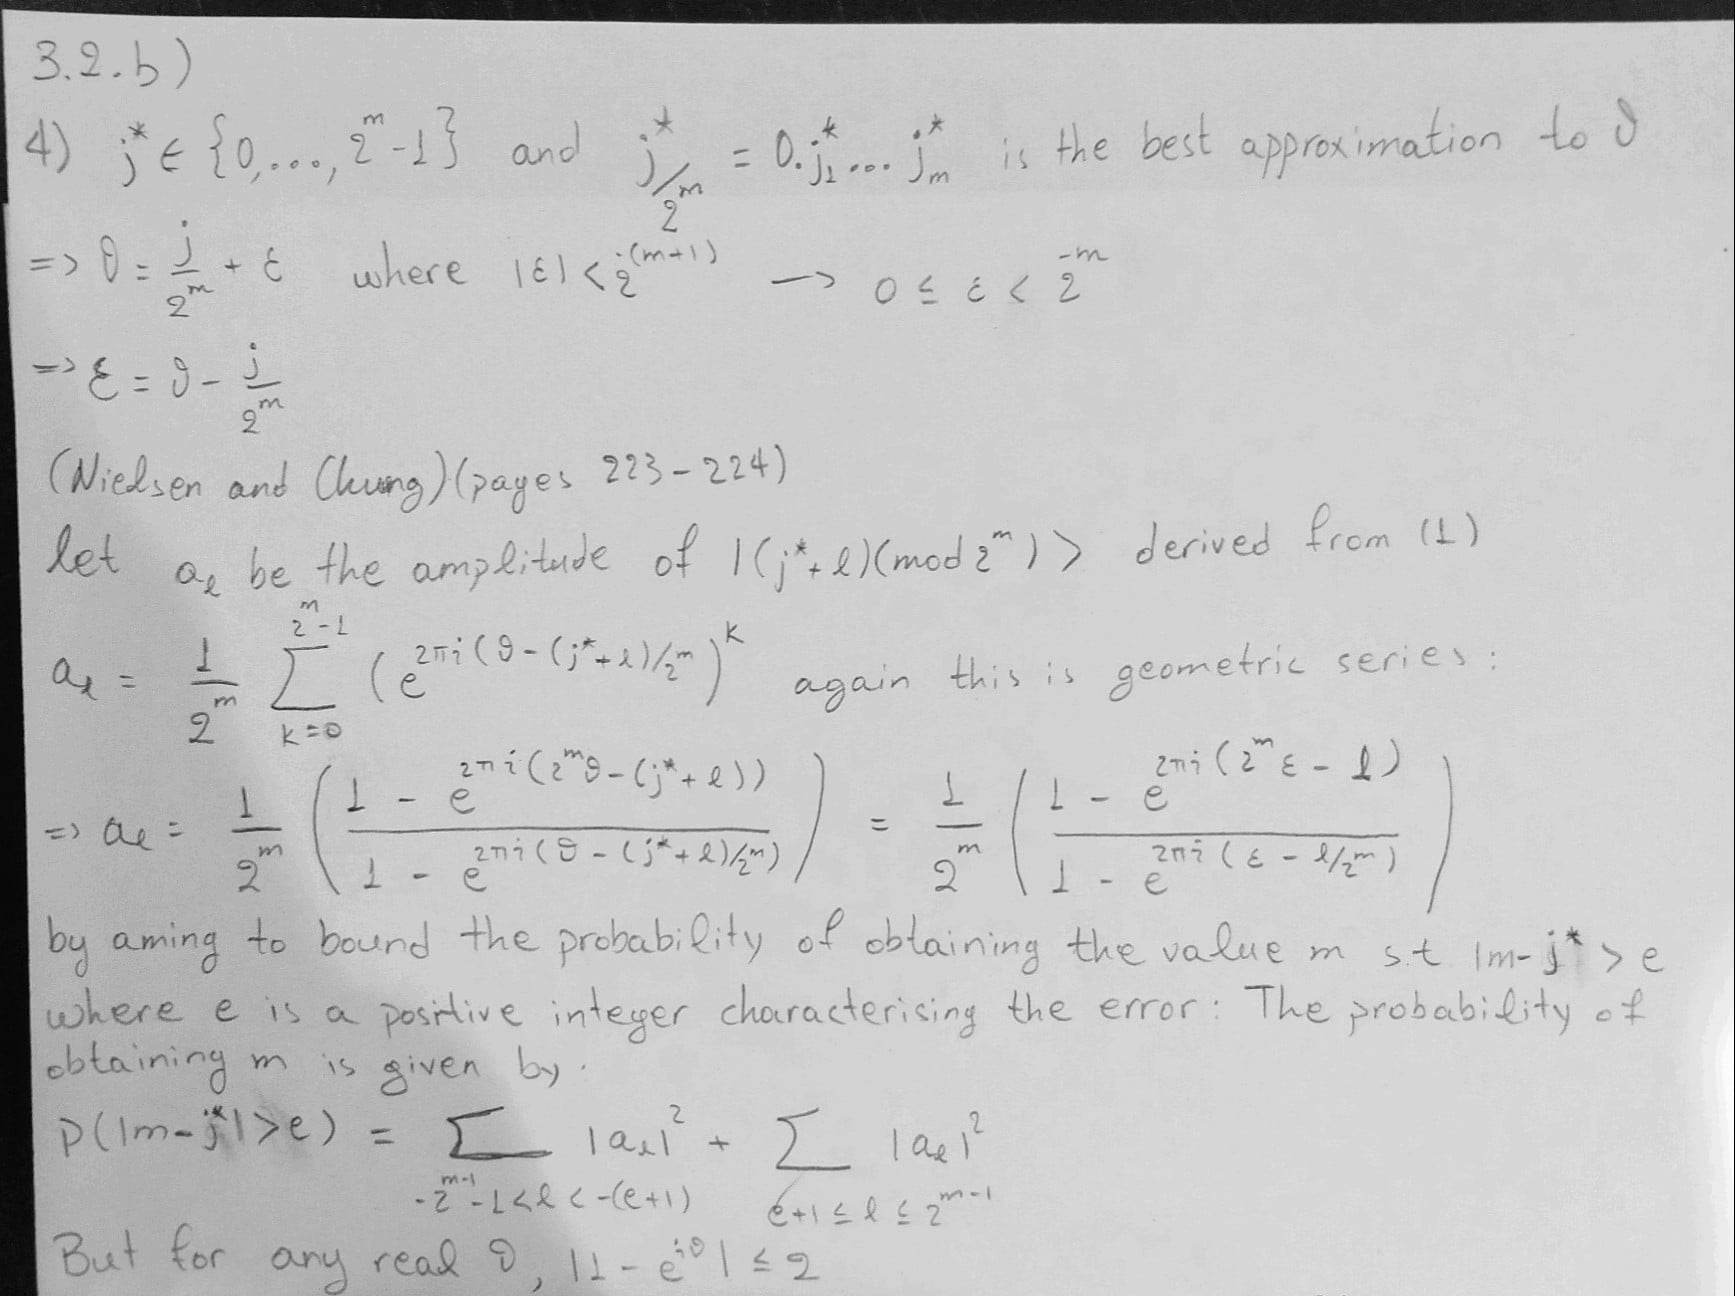

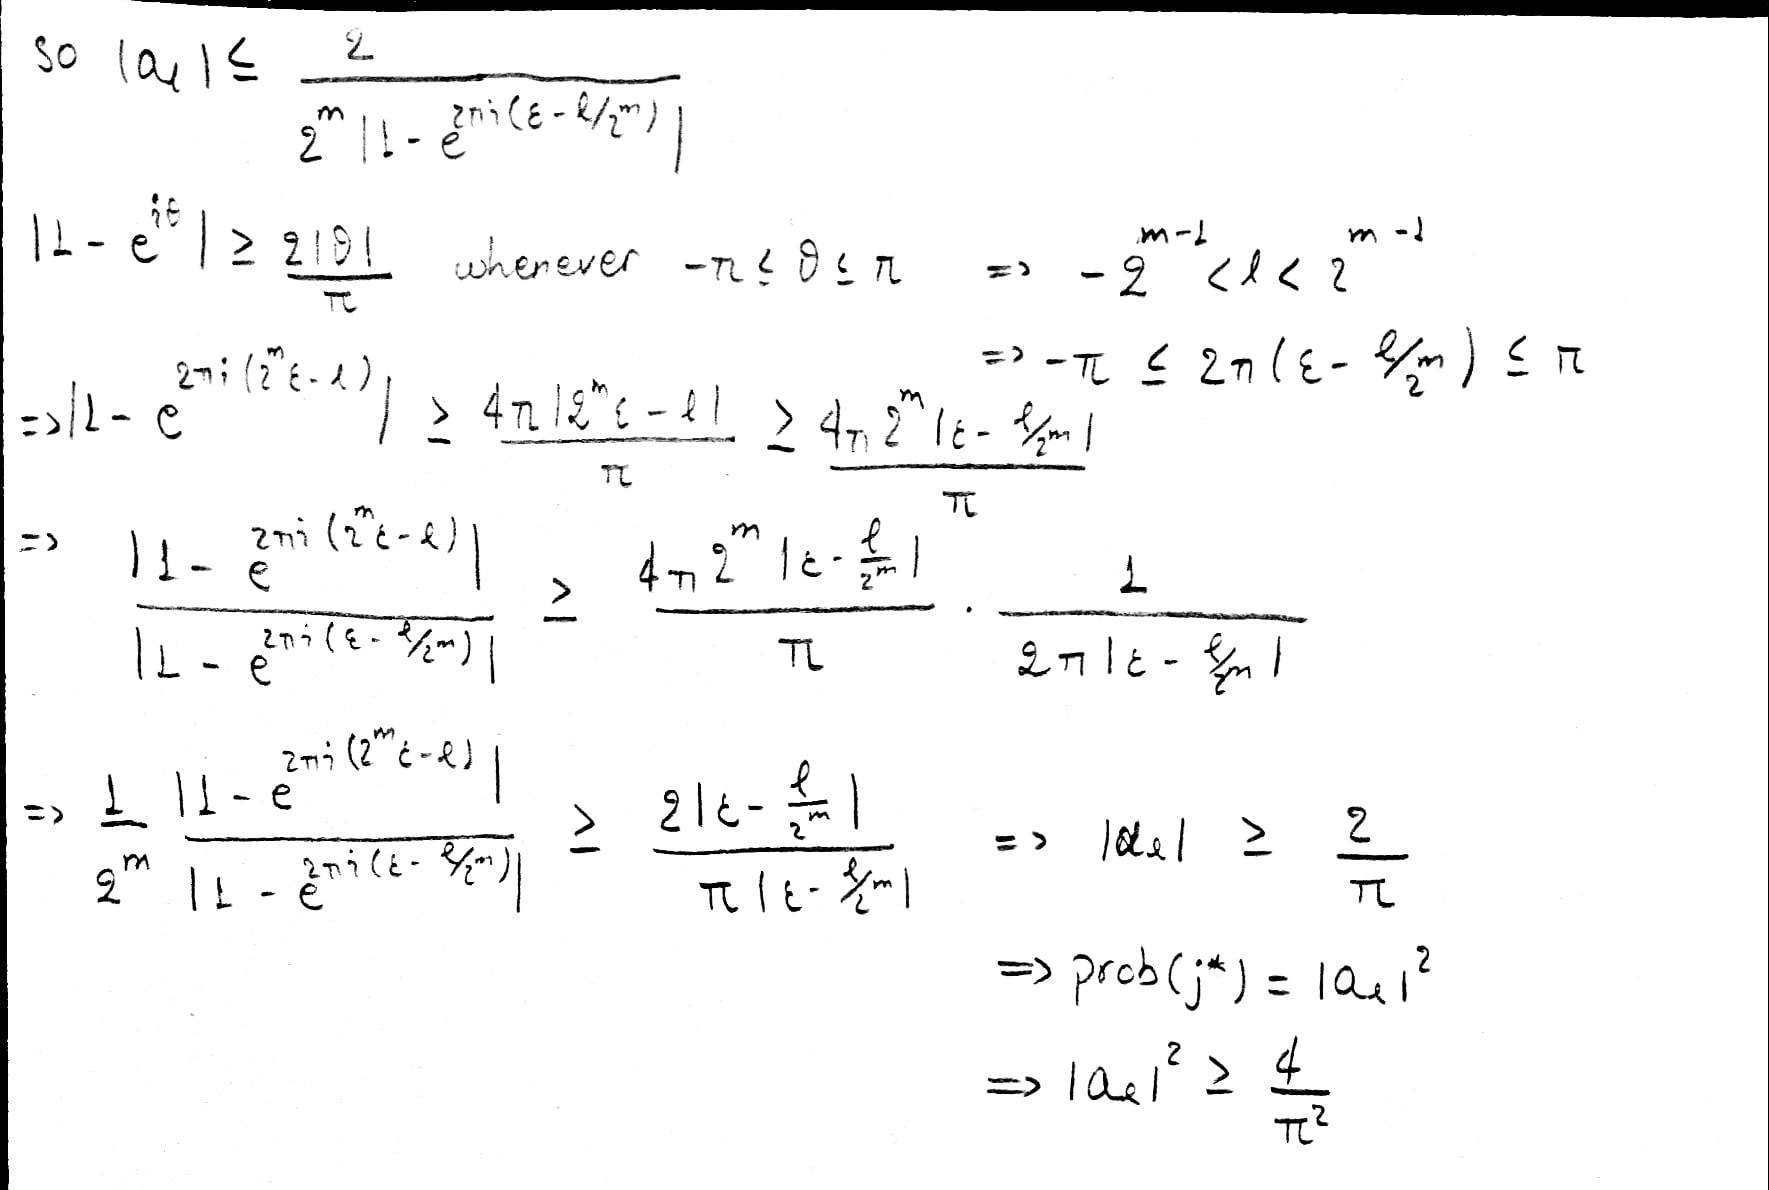

# 3.3 - Period finding (8 pts. total)
Consider a function $f:\mathbb{Z}_N\to C$, where $C$ is a finite set of values. Suppose that $f$ is known to be periodic; namely:
$$\exists s \in Z_N - \{0\} \mbox{ s.t. } f(x+s)=f(x)\,\,\,\, \forall x \in Z_N$$
Furthermore, in each period, each symbol appears only once.
The goal of this problem is to obtain $s$. For the sake of simplicity, assume $N = 2^n$ for some $n$.

## 3.3.a Classical version (2 pt.)
<ol>
  <li>Show that the periodicity condition implies that $s$ divides $N$. </li>
  <li>Show that the problem can be solved on a classical calculator with $\mathcal{O}(n)$ evaluations of the function $f$, where $n = \log_2 N$.  </li>
</ol>

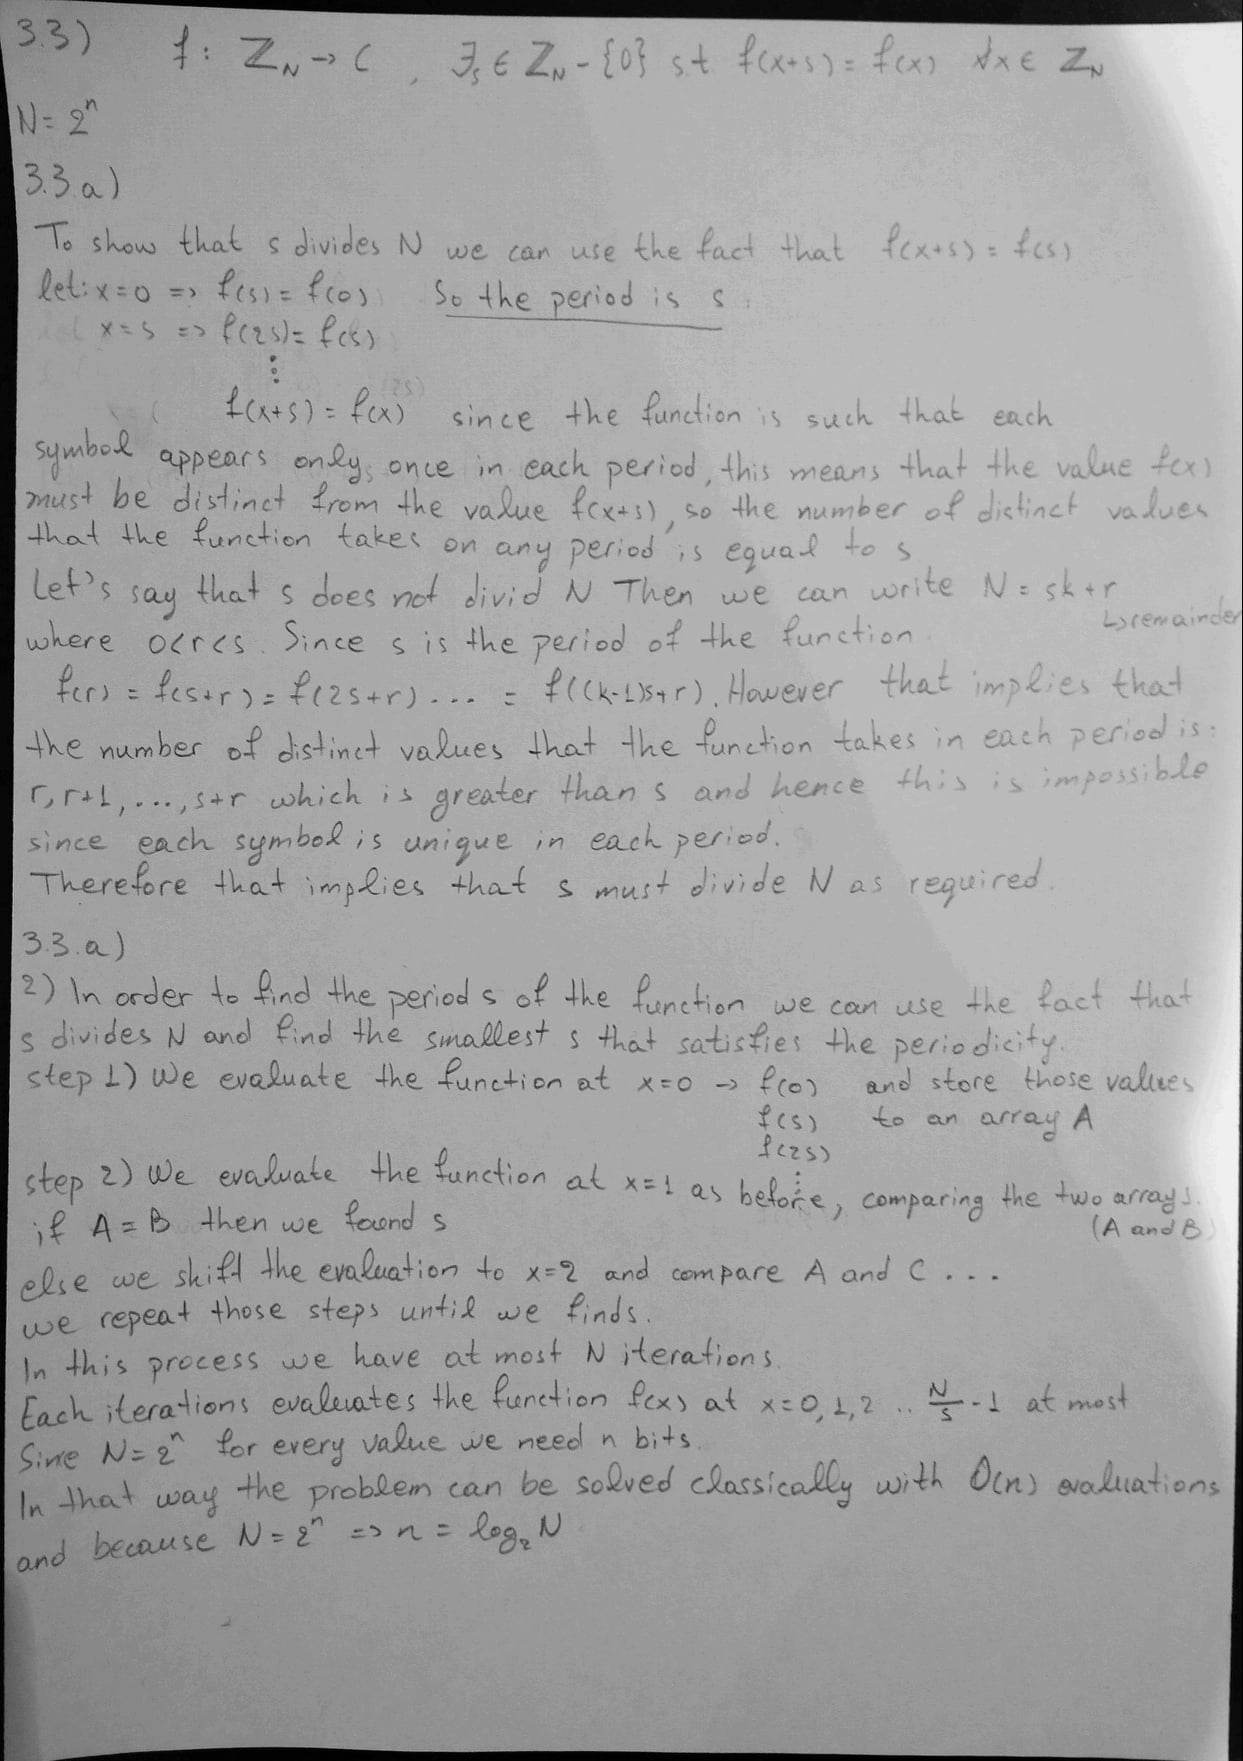

## 3.3.b Quantum protocol (3 pts.)
Consider an oracle $O_f$, acting as follows:
$$O_f(\ket{x}\ket{b}) = \ket{x}\ket{b\oplus f(x)}$$
where $b$ is a string of length $m$, and $\oplus$ represents the sum modulus $2^m$. Consider the following protocol:
<ul>
  <li>Prepare the state 
    $$\frac{1}{\sqrt{N}} \sum_{x\in Z_N} \ket{x}$$
    These first qubits constitute the <b>first register</b>.
  </li>
  <li> Attach a <b>second register</b> in state $\ket{0^m}$.</li>
  <li> Query the oracle $O_f$ on the current input.</li>
  <li> Measure the second register in the computational basis.</li>
  <li> Apply the QFT to the first register.</li> 
  <li> Measure the first register. </li>
</ul>

<ol>
  <li>Let $c \in C$ be fixed. Show that the probability of obtaining $c$ as measurement outcome on the second register is $\frac{1}{s}$.</li>
  <li>Write the state of the first register after having obtained measuremetn outcome $c$ on the second register.</li>
</ol>

<b>Hint.</b> You may find it use useful to define the auxiliary function 
$$f_c(x) = \begin{cases}1 & \mbox{ if } f(x)=c \\ 0 & \mbox { otherwise}\end{cases}$$

## 3.3.c The Fourier coefficients /1 (1 pt.)
Consider a function $g: \mathbb{Z}_N \to C$ and a number $t \in \mathbb{Z}_N$. Let $k: \mathbb{Z}_N \to C$ be another function such that $k(x) = g(x+t)$. Show that $g$ and $k$ have the same Fourier coefficients, except for a multiplicative factor of absolute value 1.

Notice that it follows that the measurement outcome on the first register does not depend on the $c$ we measured on the second register. Without loss of generality, we can hence assume to have measured $f(0)=c$. Therefore:
$$f_c(x)=\begin{cases}1 & \mbox{ if } x=0,s,2s,\ldots \\ 0 & \mbox{ otherwise}\end{cases}$$

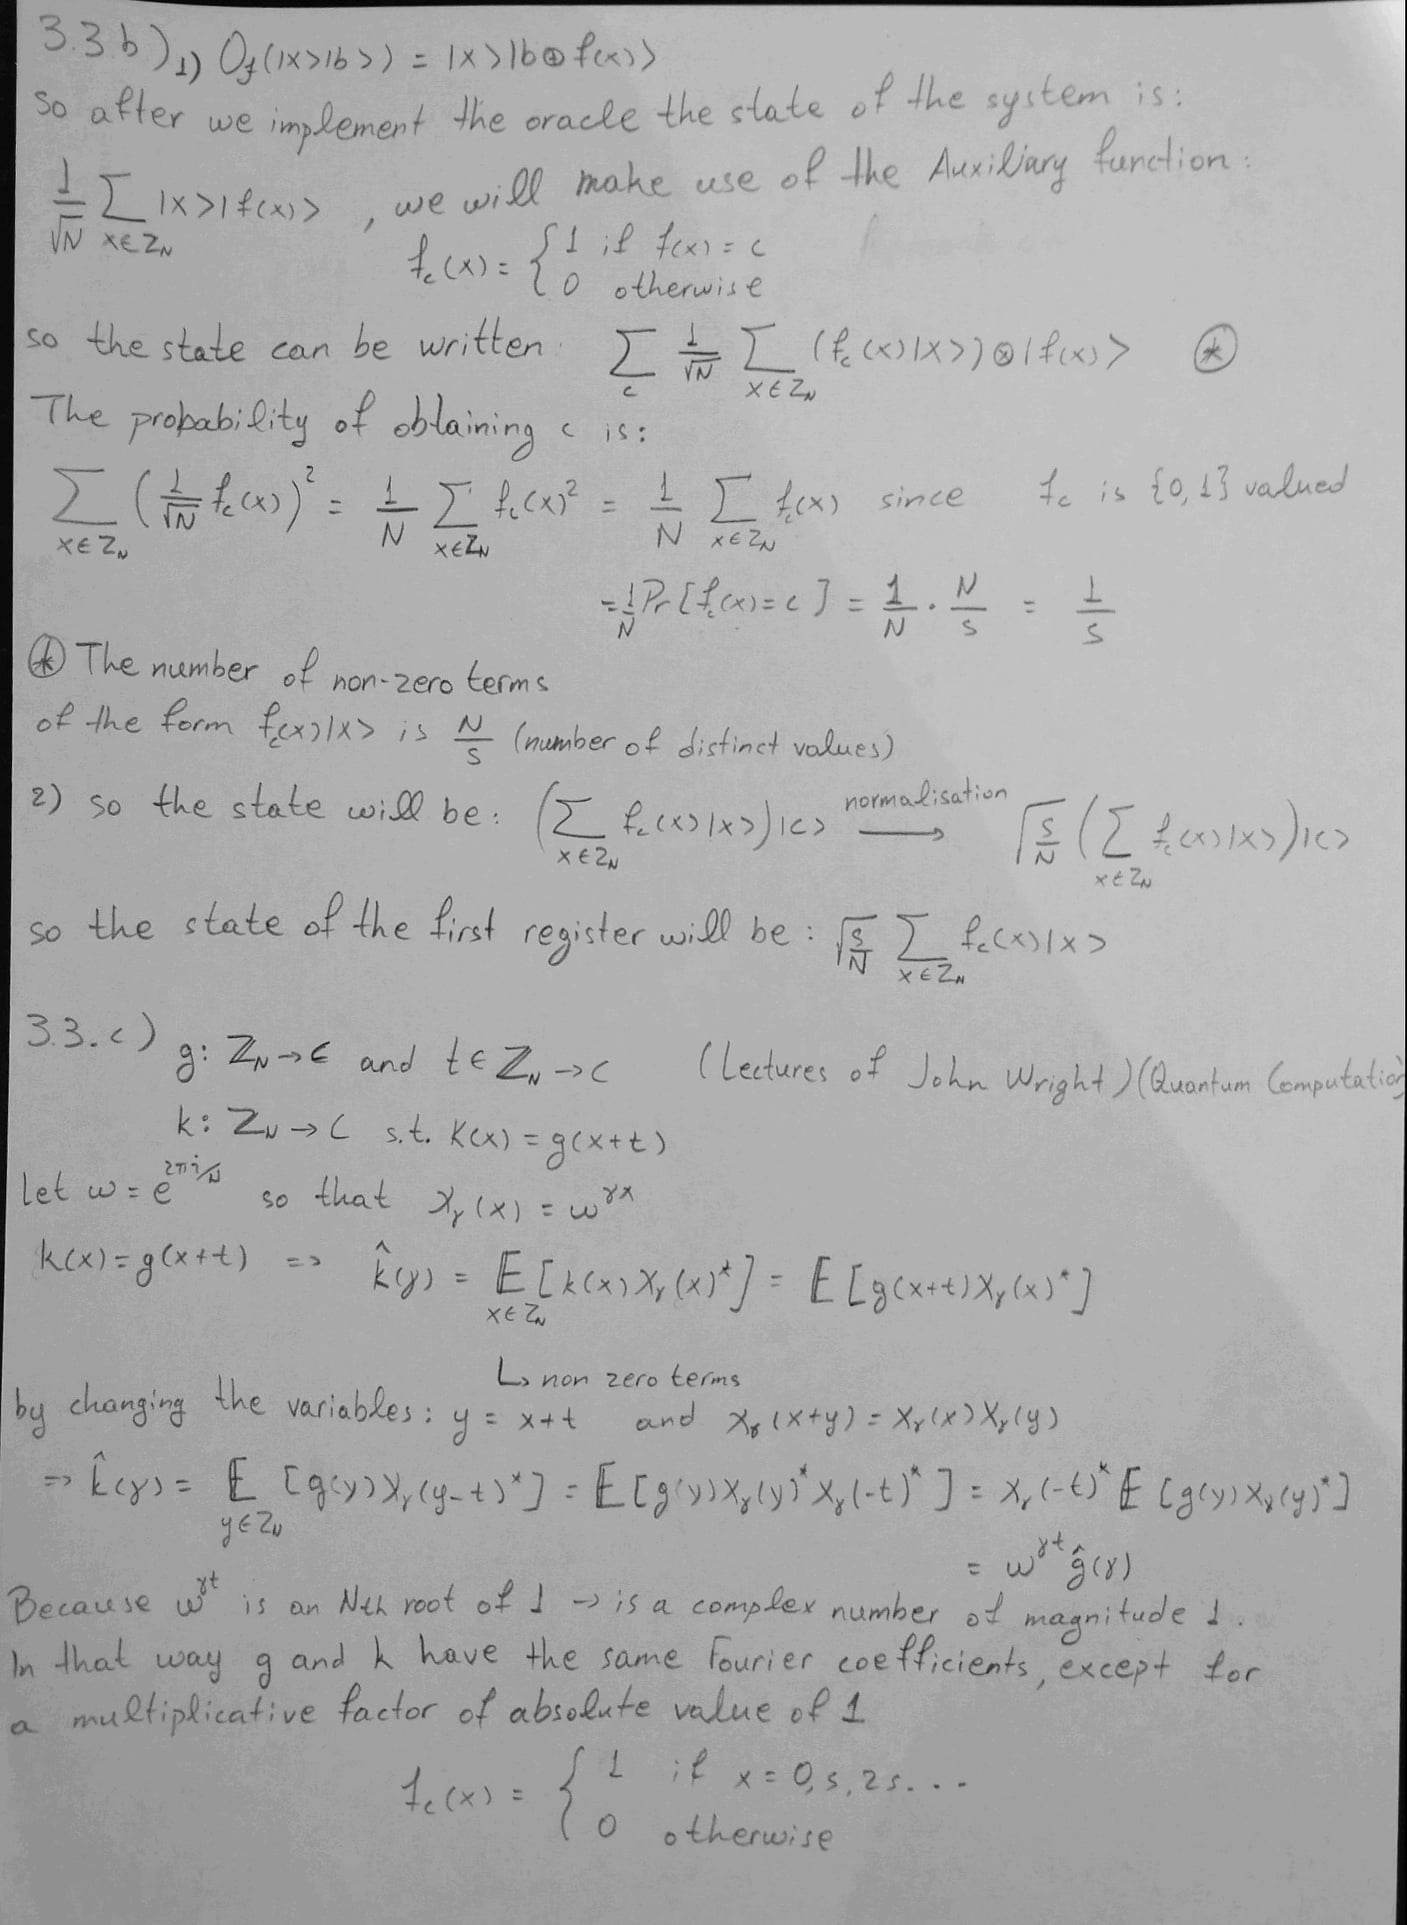

## 3.3.d The Fourier coefficients /2 (1 pt.)
Prove that $f_c(x)$ defined in this way has Fourier coefficients given by:
$$\hat{f_c}(\gamma) = \begin{cases}\frac{1}{s} & \mbox{ if } \gamma \in \{0, N/s, 2N/s,\ldots\} \\ 0 & \mbox{ otherwise}\end{cases}$$

It follows that, when performing the measurement on the first register, we are sampling uniformly a value of $\gamma$ from the set $\{0, N/s, 2N/s, \ldots \}$, or equivalently from the $\gamma$ values such that $\gamma s =0 \mod N$.

## 3.3.e Finding the period (1 pt.)
Describe how the measurement outcomes obtained from the measurement on the first register can be used to find the period of the function $f$.

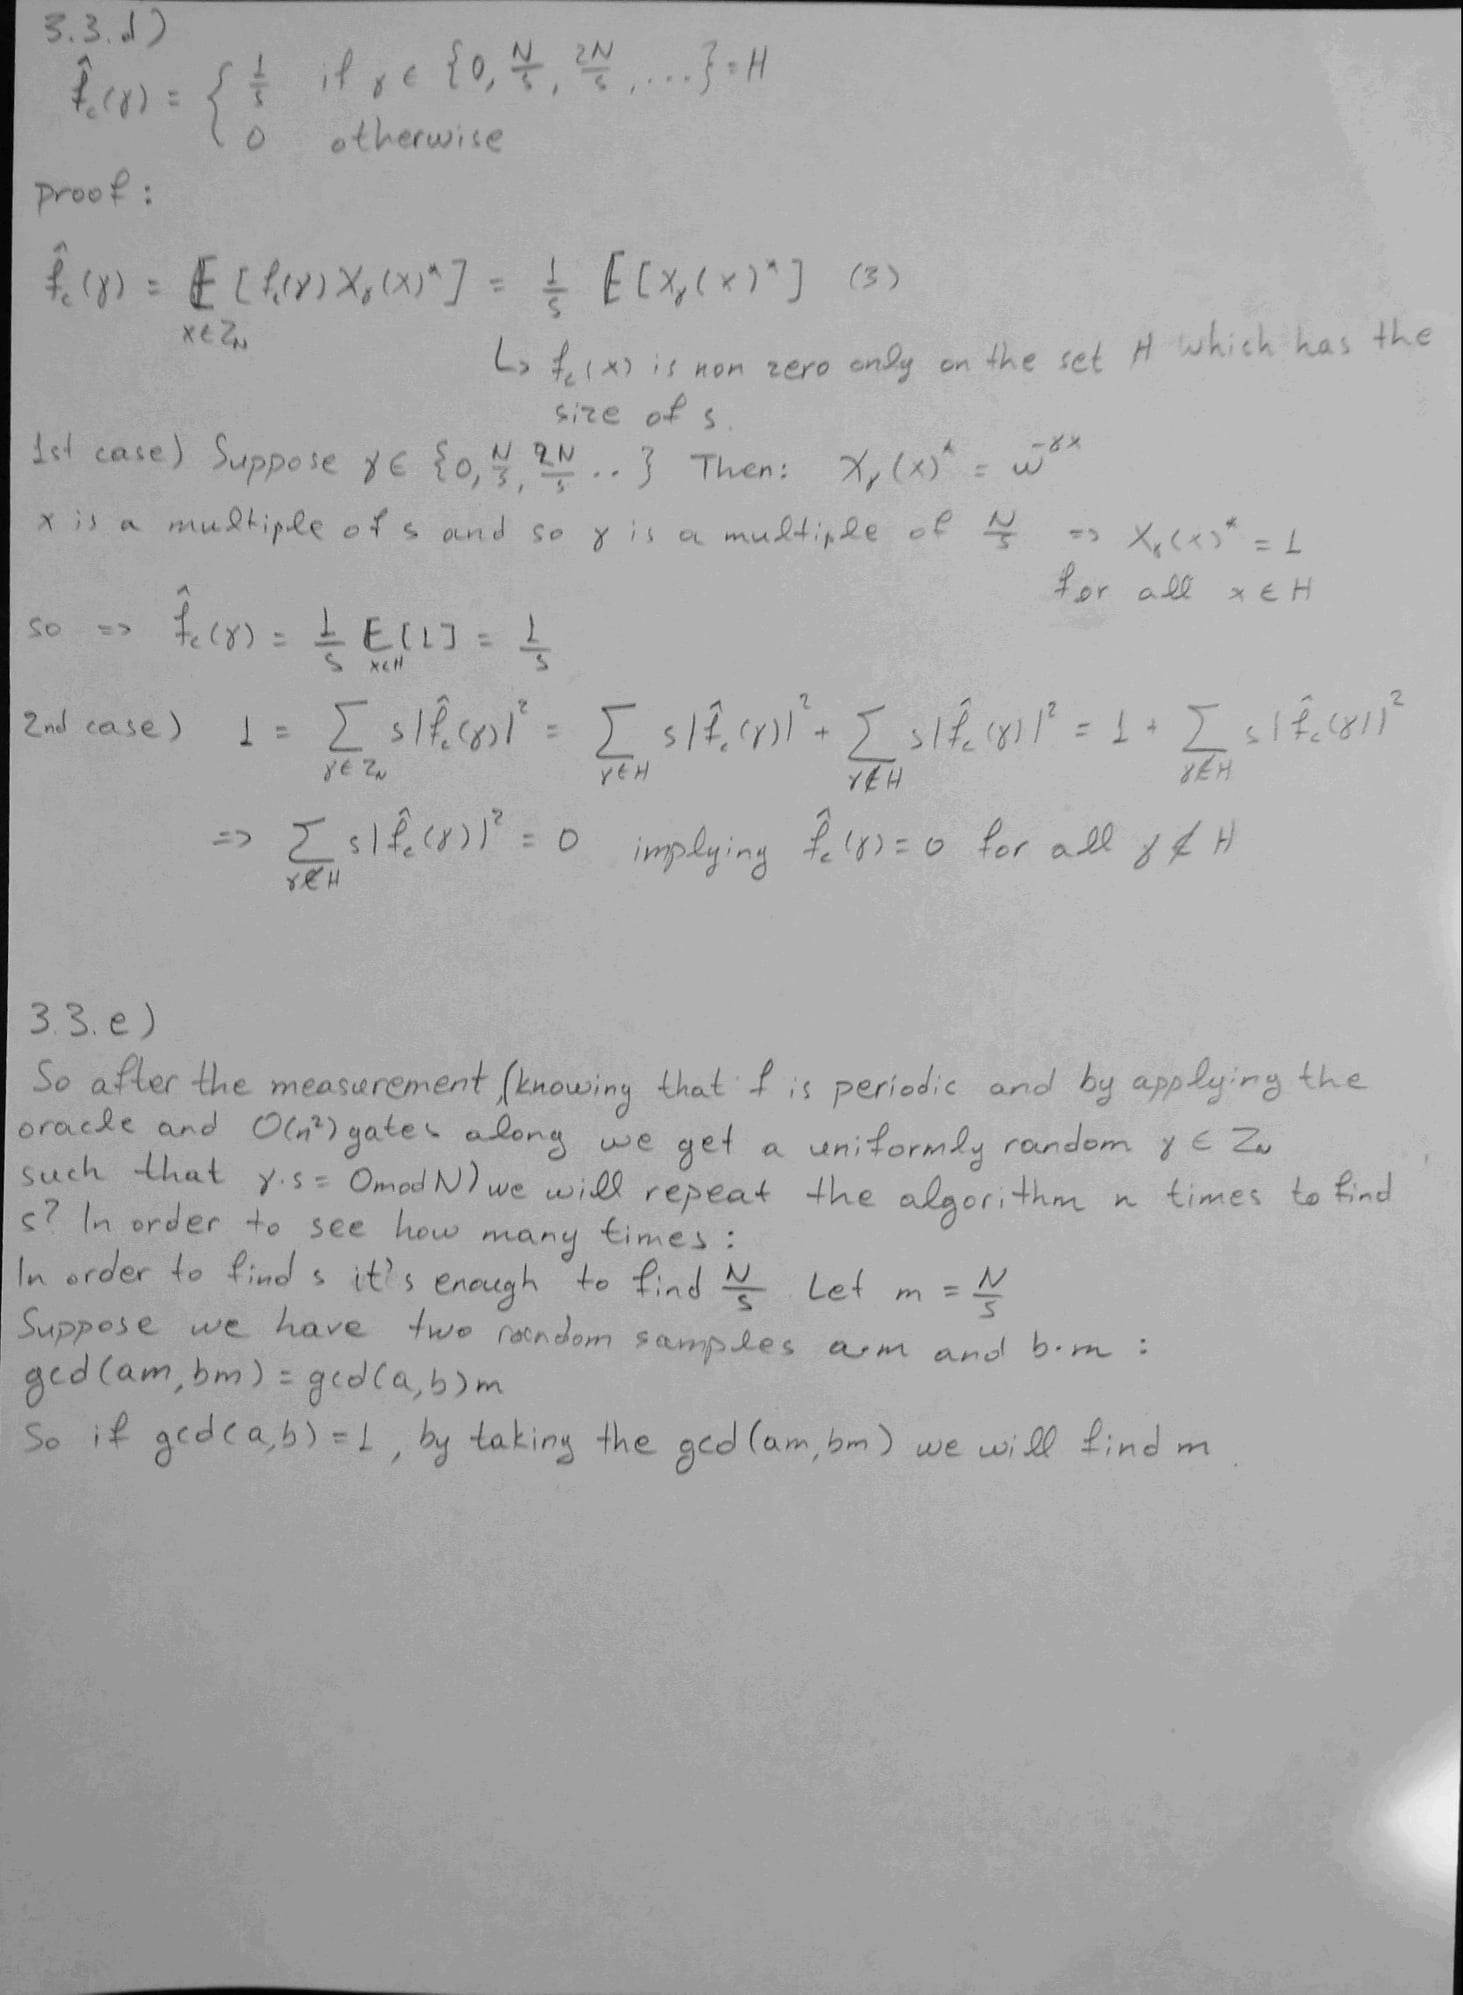

# 3.4 - Factoring (6 pts. total)
The aim of this exercise is to build a specific implementation of Shor's factoring algorithm, which will allow factorisation of the number $15$. 

## 3.4.a Classical auxiliary functions  (1 pt.)
First of all, some classical subroutines are required. Write the following Python functions:
<ol>
    <li> <code>gcd(x,y)</code>, which computes the greatest common divisor between the numbers <code>x</code> and <code>y</code>. </li>
    <li> <code>verify_factor(N,x)</code>, which verifies whether <code>x</code> is a factor of <code>N</code>. 
</ol>
Discuss the scaling of the computational complexity of the latter function in terms of the number of bits required to encode $N$ and in reference to the complexity class *NP*.

In [127]:
#defining function that calculates the greatest common divisor between x and y
def gcd(x,y):
    while y != 0:
        x, y = y, x%y
    return x

In [130]:
#defining function that verifies whether x is a factor of N
def verify_factor(N, x):
    if N%x == 0:
        return True
    else:
        return False

In [ ]:
#The complexity of the verify_factor function belongs to the NP category since it takes polynomial time to excecute 
#a simple division and it can be verified.

## 3.4.b Classical period finding (1 pt.)
Consider the function
$$f(x) = a^x \mod N$$
where $a$, $x$ and $N$ are numbers in $\mathbb{N}$, and $a$ is prime. It can be shown that the function $f(x)$ is periodic, and that each value of $f(x)$ appears only once in each period.

Define a Python function <code>classical_period_find(a,N)</code> that computes the period of the function $f(x)$ of the form specified above, for given $a$ and $N$. Discuss the complexity of the function, in terms of the bits required to encode $N$.

Next, define a Python function <code>period_verify(a,N,p)</code>, which verifies whether the proposed $p$ is the correct period of $f(x)$. Discuss its complexity in terms of the bits required for encoding $N$. Discuss the relation between <code>classical_period_find</code> and <code>period_verify</code> in reference to the complexity class *NP*.

In [149]:
def f(x,a,N):
    return (a**x) % N


def classical_period_find(a, N):
    # Calculate f(1) to initialize the function value
    f1 = f(1, a, N)
    # Initialize x to 2
    x = 2
    
    # Loop while x is less than or equal to N
    while x <= N:
        # Calculate f(x)
        fx = f(x, a, N)
        
        # Check if f(x) is equal to f(1)
        if fx == f1:
            # If they are equal, we have begun another period, so x-1 is the period of the function.
            return x - 1
        # Increment x by 1
        x += 1
    
    # If no period is found, return None
    return None

def period_verify(a,N,p):
    if classical_period_find(a,N) == p:
        return True
    else:
        return False

In [ ]:
#For the classical_period_find function is O(N log N log a). Here a is the base of the exponentiation operation used in the
#f function. This is because for each value of x from 2 to N, the function needs to calculate f(x, a, N) which involves
#performing an exponentiation operation with a base of a and an exponent of x. Since the bit-length of N is O(log N),
#the exponentiation operation requires O(log N) operations, and since the calculation is performed O(N) times, the
#total complexity is O(N log N log a).

#The period_verify function is NP because is a polynomial-time algorithm that takes as input a candidate period p and verifies
#whether the value p is the same as the value of the classical_period_find. So it can be verified in polynomial time.



## 3.4.c Quantum period finding (2pt.)
For the specific case of $a=2$, $N=15$, write the Qiskit code for quantum period finding (Shor's algorithm). 

In [266]:
#from qiskit textbook implementing the steps for this spesific case
def amod15(power):
    Ucirc = QuantumCircuit(4)        
    for i in range(power):
            Ucirc.swap(2,3)
            Ucirc.swap(1,2)
            Ucirc.swap(0,1)
    Ugate = Ucirc.to_gate(label = '2^{} mod 15'.format(power))
    c_Ucirc = Ucirc.control()
    return c_Ucirc

def s_circ(qcirc,count):  #shor's circuit
    
    #initialize the states applying Hgates and an Xgate
    qcirc.h(range(count))
    qcirc.x(count)

    # Apply controlled Ucirc
    for j in range(count):
        qcirc.append(amod15(2**j),[j] + [i + count for i in range(4)])
    qcirc.barrier()
    
    # Apply inverse qft
    invqft(qcirc,count)
    qcirc.barrier()
    
    for i in range(count):
        qcirc.measure(i,i) #measure
    
    return qcirc

#testing with 4 qubits to find the period
count = 4 
QPFcirc = QuantumCircuit(count+4, count)
s_circ(QPFcirc,count)
QPFcirc.draw()

┌───┐┌─────────────────┐                                      »
q_0: ┤ H ├┤0                ├──────────────────────────────────────»
     ├───┤│                 │┌─────────────────┐                   »
q_1: ┤ H ├┤                 ├┤0                ├───────────────────»
     ├───┤│                 ││                 │┌─────────────────┐»
q_2: ┤ H ├┤                 ├┤                 ├┤0                ├»
     ├───┤│                 ││                 ││                 │»
q_3: ┤ H ├┤                 ├┤                 ├┤                 ├»
     ├───┤│  c_circuit-2489 ││                 ││                 │»
q_4: ┤ X ├┤1                ├┤1 c_circuit-2504 ├┤1                ├»
     └───┘│                 ││                 ││  c_circuit-2522 │»
q_5: ─────┤2                ├┤2                ├┤2                ├»
          │                 ││                 ││                 │»
q_6: ─────┤3                ├┤3                ├┤3                ├»
          │                 ││                 ││                 │»
q_7: ─────┤4                ├┤4                ├┤4                ├»
          └─────────────────┘└─────────────────┘└─────────────────┘»
c: 4/══════════════════════════════════════════════════════════════»
                                                                   »
«                         ░    ┌───┐                                   »
«q_0: ────────────────────░──X─┤ H ├─■──────────────■──────────────────»
«                         ░  │ └───┘ │P(-π/2) ┌───┐ │                  »
«q_1: ────────────────────░──┼───X───■────────┤ H ├─┼─────────■────────»
«                         ░  │   │            └───┘ │P(-π/4)  │P(-π/2) »
«q_2: ────────────────────░──┼───X──────────────────■─────────■────────»
«     ┌─────────────────┐ ░  │                                         »
«q_3: ┤0                ├─░──X─────────────────────────────────────────»
«     │                 │ ░                                            »
«q_4: ┤1                ├─░────────────────────────────────────────────»
«     │                 │ ░                                            »
«q_5: ┤2 c_circuit-2546 ├─░────────────────────────────────────────────»
«     │                 │ ░                                            »
«q_6: ┤3                ├─░────────────────────────────────────────────»
«     │                 │ ░                                            »
«q_7: ┤4                ├─░────────────────────────────────────────────»
«     └─────────────────┘ ░                                            »
«c: 4/═════════════════════════════════════════════════════════════════»
«                                                                      »
«                                              ░ ┌─┐         
«q_0: ─■───────────────────────────────────────░─┤M├─────────
«      │                                       ░ └╥┘┌─┐      
«q_1: ─┼──────────────■────────────────────────░──╫─┤M├──────
«      │        ┌───┐ │                        ░  ║ └╥┘┌─┐   
«q_2: ─┼────────┤ H ├─┼─────────■──────────────░──╫──╫─┤M├───
«      │P(-π/8) └───┘ │P(-π/4)  │P(-π/2) ┌───┐ ░  ║  ║ └╥┘┌─┐
«q_3: ─■──────────────■─────────■────────┤ H ├─░──╫──╫──╫─┤M├
«                                        └───┘ ░  ║  ║  ║ └╥┘
«q_4: ─────────────────────────────────────────░──╫──╫──╫──╫─
«                                              ░  ║  ║  ║  ║ 
«q_5: ─────────────────────────────────────────░──╫──╫──╫──╫─
«                                              ░  ║  ║  ║  ║ 
«q_6: ─────────────────────────────────────────░──╫──╫──╫──╫─
«                                              ░  ║  ║  ║  ║ 
«q_7: ─────────────────────────────────────────░──╫──╫──╫──╫─
«                                              ░  ║  ║  ║  ║ 
«c: 4/════════════════════════════════════════════╩══╩══╩══╩═
«                                                 0  1  2  3

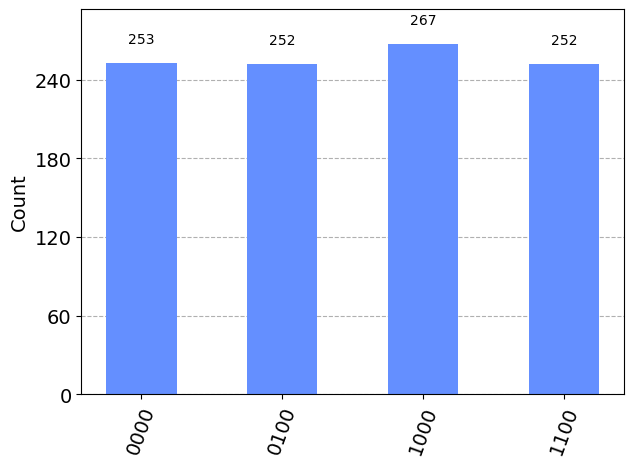

In [261]:
#simulating to get result(qiskit textbook)
aer_sim = Aer.get_backend('aer_simulator')
tQPF = transpile(QPFcirc, aer_sim) 
qobj = assemble(tQPF)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
mfr = list(counts.keys()) # most frequent results
plot_histogram(counts)

In [262]:
# Converting to decimal(qiskit textbook)
for i in range(len(mfr)):
    mfr[i] = int(mfr[i],2)
mfr.sort()

Pass the most frequent outcomes to the following function, which estimates the compatible periods using a variant of the continuous-fractions algorithm. You can verify which one of the candidates is the correct period using the <code>period_verify</code> function.

In [263]:
def estimate_period(shor_result):
    res_range = 16
    
    if shor_result < res_range/2:
        shor_result = res_range - shor_result
        
    best_error = 1.
    e0 = 0
    e1 = 1
    e2 = 0
    
    actual = shor_result / res_range
    candidates = []
    
    for denominator in range(1, shor_result):
        numerator = round(denominator * actual)
        estimated = numerator / denominator 
        error = abs(estimated - actual)
        
        e0 = e1
        e1 = e2
        e2 = error
        
        if e1 <= best_error and e1 < e0 and e1 < e2:
            repeat_period = denominator - 1
            candidates.append(denominator - 1)
            best_error = e1
            
        if 0 in candidates:
            candidates.remove(0)
        
    return candidates

In [264]:
a = 2
N = 15
print('the most frequent results are:', mfr)

p1 = estimate_period(mfr[0])
p2 = estimate_period(mfr[1])
p3 = estimate_period(mfr[2])
p4 = estimate_period(mfr[3])

print('the estimated period is:', p1,' ',p2,' ',p3,' ',p4)
print('p = 2',period_verify(a,N,p3[0]))
print('p = 4',period_verify(a,N,p2[0]))
print('p = 8',period_verify(a,N,p2[1]))
print('p = 6',period_verify(a,N,p3[2]))

the most frequent results are: [0, 4, 8, 12]
the estimated period is: []   [4, 8]   [2, 4, 6]   [4, 8]
p = 2 False
p = 4 True
p = 8 False
p = 6 False


In [185]:
#the most frequent result is 4 which corresponds to the value that we were expecting

## 3.4.d Prime factoring (1 pt.)
Now, use the function <code>gcd</code> to return the factorisation of the number $15$ from Shor's algorithm. If $p$ is the period of the function $f(x)$, then one of $N$'s prime factor might be given by 
$$\gcd\left(N, a^{p/2}+1\right)$$
or by
$$\gcd\left(N, a^{p/2}-1\right)$$

In [190]:
factor1 = gcd(N,(a**p2[0]/2) + 1)
factor2 = N/factor1

print('the factors of 15 are:',factor1,'and',factor2)

the factors of 15 are: 3.0 and 5.0


In [250]:
factor1 = gcd(N,(a**p2[0]/2) - 1)
factor2 = N/factor1

print('the factors of 15 are:',factor1,'and',factor2)

the factors of 15 are: 1.0 and 15.0
